1. Have you come across Grid Search Cross Validation? Fit any two models covered in previous 
classes and optimize them using Grid search CV.


In [11]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.datasets import load_breast_cancer 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
 

dataset = load_breast_cancer()
X=dataset.data
Y=dataset.target
X_train, X_test, y_train, y_test = train_test_split( 
                        X,Y,test_size = 0.30, random_state = 101) 

model = SVC() 
model.fit(X_train, y_train) 
   
# print prediction results 
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [ ]:
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear']}  
   
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
#
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 

 2. What is Stride, Padding & Pooling? Explain with an example
Padding

There are two problems arises with convolution: 

1. Every time after convolution operation, original image size getting 
shrinks, as we have seen in above example six by six down to four by 
four and in image classification task there are multiple convolution 
layers so after multiple convolution operation, our original image will 
really get small but we don’t want the image to shrink every time. 

2. The second issue is that, when kernel moves over original images, it 
touches the edge of the image a smaller number of times and 
touches the middle of the image a greater number of times and it 
overlaps also in the middle. So, the corner features of any image or 
on the edges aren’t used much in the output. 
So, in order to solve these two issues, a new concept is introduced 
called padding. Padding preserves the size of the original image. Padding is a 
term relevant to convolutional neural networks as it refers to the amount of pixels 
added to an image when it is being processed by the kernel of a CNN. For 
example, if the padding in a CNN is set to zero, then every pixel value that is added 
will be of value zero.
![image.png](attachment:image.png)
So if a 𝑛∗𝑛 matrix convolved with an f*f matrix the with padding p then the size of the output image will be (n + 2p — f + 1) * (n + 2p — f + 1) where p =1 in this case.

Stride
![image-2.png](attachment:image-2.png)
left image: stride =0, middle image: stride = 1, right image: stride =2

left image: stride =0, middle image: stride = 1, right image: stride =2
Stride is the number of pixels shifts over the input matrix. For padding p, filter size 𝑓∗𝑓 and input image size 𝑛 ∗ 𝑛 and stride ‘𝑠’ our output image dimension will be [ {(𝑛 + 2𝑝 − 𝑓 + 1) / 𝑠} + 1] ∗ [ {(𝑛 + 2𝑝 − 𝑓 + 1) / 𝑠} + 1].

Pooling
A pooling layer is another building block of a CNN. Pooling Its function is to progressively reduce the spatial size of the representation to reduce the network complexity and computational cost.

There are two types of widely used pooling in CNN layer:

Max Pooling
Average Pooling
Max Pooling

Max pooling is simply a rule to take the maximum of a region and it helps to proceed with the most important features from the image. Max pooling selects the brighter pixels from the image. It is useful when the background of the image is dark and we are interested in only the lighter pixels of the image.
![image-3.png](attachment:image-3.png)
![image-5.png](attachment:image-5.png)



Average Pooling

Average Pooling is different from Max Pooling in the sense that it retains much information about the “less important” elements of a block, or pool. Whereas Max Pooling simply throws them away by picking the maximum value, Average Pooling blends them in. This can be useful in a variety of situations, where such information is useful.
![image-4.png](attachment:image-4.png)
![image-6.png](attachment:image-6.png)

reference
https://medium.com/analytics-vidhya/convolution-padding-stride-and-pooling-in-cnn-13dc1f3ada26




3. Fit a CNN model on the dataset which has been assigned to you. Print a classification report to 
see the model metrics on train and test datasets.

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# **Import library**

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pickle 
from timeit import default_timer as timer 
from keras.utils.np_utils import to_categorical
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape # CNN Layer type
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler 

# Preparing data

In [3]:
with open("D:/Lab/ML/Lab07/data2.pickle",'rb') as f:
    data=pickle.load(f,encoding='latin1')
    

data['y_train']=to_categorical(data['y_train'],num_classes=43)
data['y_validation']=to_categorical(data['y_validation'],num_classes=43)


data['x_train']=data['x_train'].transpose(0,2,3,1)
data['x_validation']=data['x_validation'].transpose(0,2,3,1)
data['x_test']=data['x_test'].transpose(0,2,3,1)

for i,j in data.items():
    if(i=='labels'):
        print(i+':',len(j))
    else:
        print(i+':',j.shape)

y_test: (12630,)
y_validation: (4410, 43)
x_validation: (4410, 32, 32, 3)
x_train: (86989, 32, 32, 3)
y_train: (86989, 43)
labels: 43
x_test: (12630, 32, 32, 3)


# Show some examples of training data

(81, 32, 32, 3)


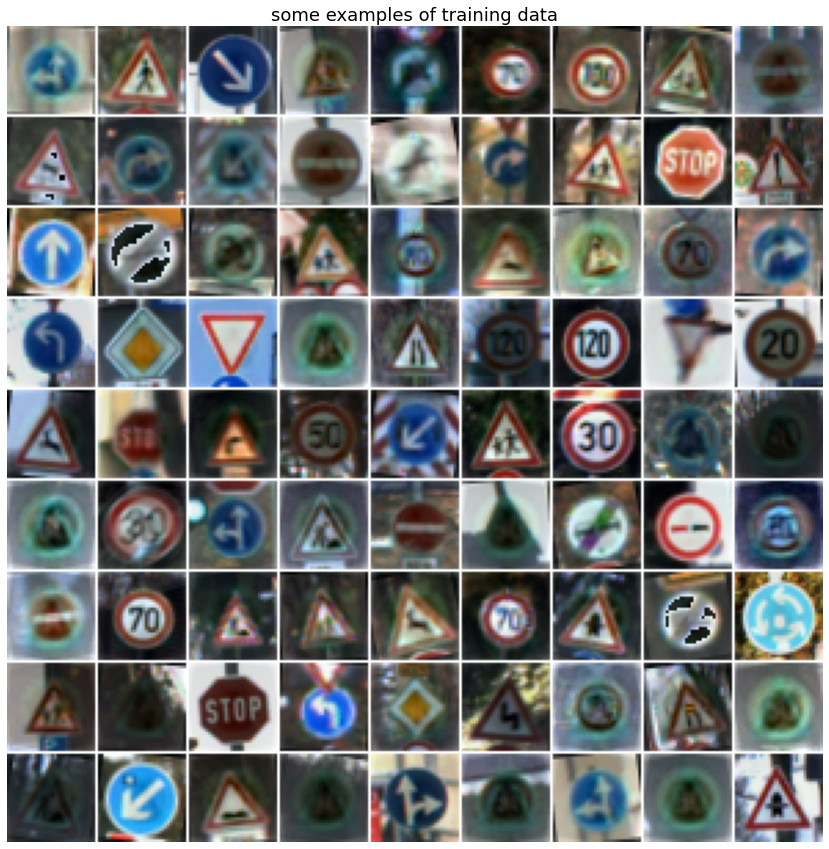

In [4]:
%matplotlib inline

def convert_to_grid(x_input):
    N,H,W,C=x_input.shape
    grid_size=int(np.ceil(np.sqrt(N)))
    grid_height=H * grid_size + 1*(grid_size-1)
    grid_width=W * grid_size + 1*(grid_size-1)
    grid=np.zeros((grid_height,grid_width,C))+255
    next_idx=0
    y0,y1=0,H
    for y in range(grid_size):
        x0,x1=0,W
        for x in range(grid_size):
            if(next_idx<N):
                img=x_input[next_idx]
                low,high=np.min(img),np.max(img)
                grid[y0:y1,x0:x1]=255.0*(img-low)/(high-low)
                next_idx+=1
            x0+=W+1
            x1+=W+1
        y0+=H+1
        y1+=H+1
    return grid

examples=data['x_train'][:81,:,:,:]
print(examples.shape)

fig=plt.figure()
grid=convert_to_grid(examples)
plt.imshow(grid.astype("uint8"),cmap='gray')
plt.axis('off')
plt.gcf().set_size_inches(15,15)
plt.title('some examples of training data',fontsize=18)

plt.show()

fig.savefig('training_examples.png')
plt.close()
    

# Building CNN Model & Training Model
# * convolution layer 
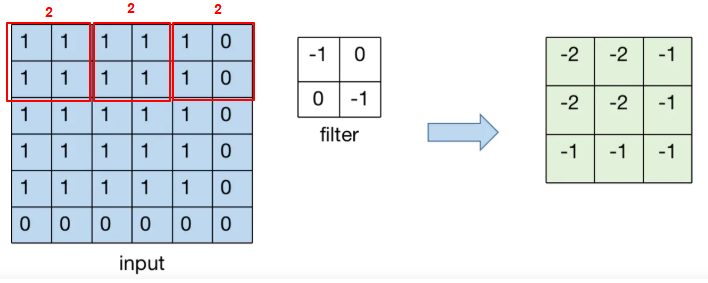
# * padding
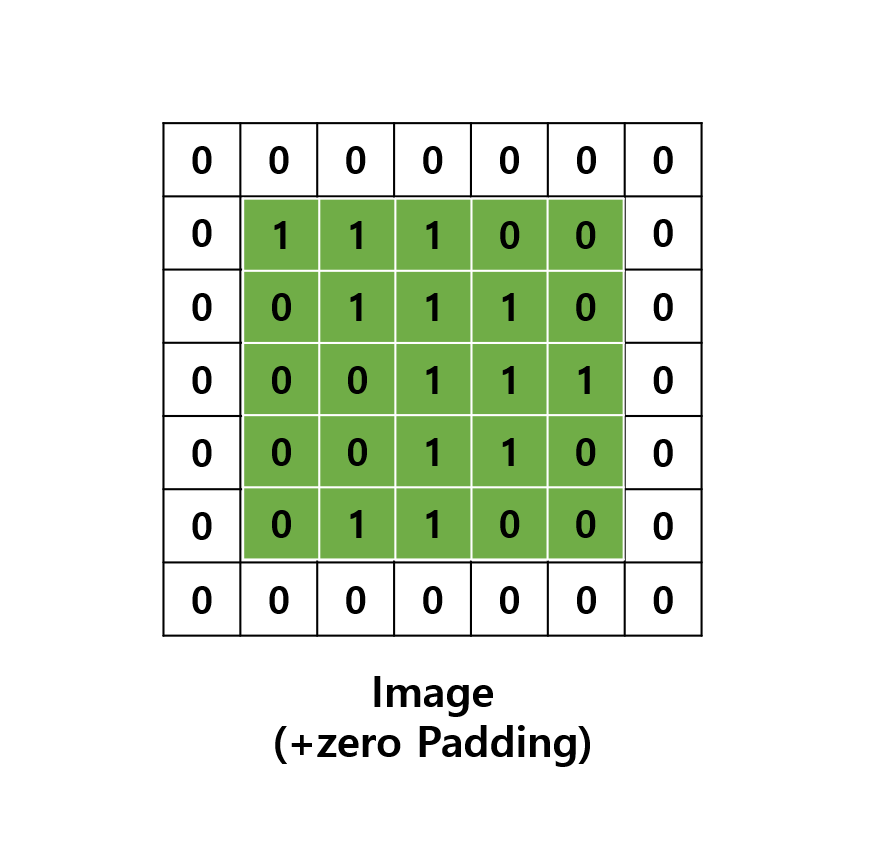

In [5]:
model=Sequential()
model.add(Conv2D(32,kernel_size=3,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(43,activation='softmax'))

# Convolution Model 
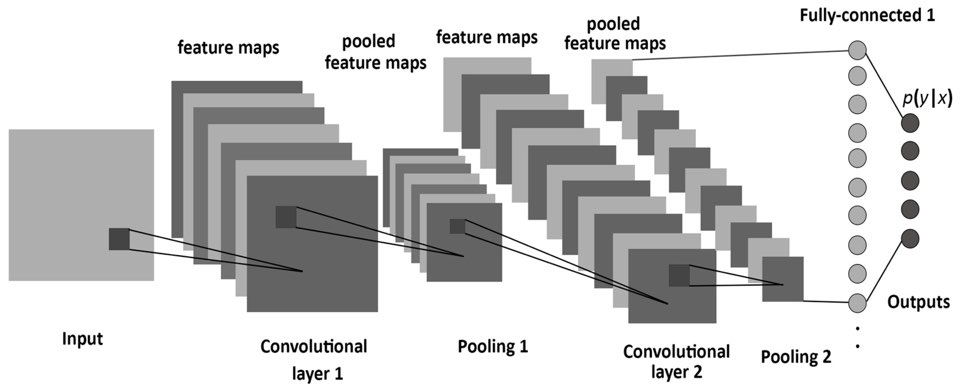

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 500)               4096500   
                                                                 
 dense_1 (Dense)             (None, 43)                21543     
                                                                 
Total params: 4,118,939
Trainable params: 4,118,939
Non-trainable params: 0
______________________________________________

In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Overfitting the 3x3 model with small amount of data

In [8]:
annealer=LearningRateScheduler(lambda x:1e-3*0.95**(x+epochs))
epochs=15
h=model.fit(data['x_train'][:10],data['y_train'][:10],
           batch_size=5,epochs=epochs,
           validation_data=(data['x_validation'],data['y_validation']),
           callbacks=[annealer],verbose=1)

Epoch 1/15
2/2 [==============================] - 4s 3s/step - loss: 3.8261 - accuracy: 0.0000e+00 - val_loss: 3.8272 - val_accuracy: 0.0202 - lr: 4.6329e-04
Epoch 2/15
2/2 [==============================] - 3s 3s/step - loss: 3.1485 - accuracy: 0.5000 - val_loss: 4.1240 - val_accuracy: 0.0397 - lr: 4.4013e-04
Epoch 3/15
2/2 [==============================] - 3s 3s/step - loss: 2.6567 - accuracy: 0.5000 - val_loss: 4.6952 - val_accuracy: 0.0410 - lr: 4.1812e-04
Epoch 4/15
2/2 [==============================] - 3s 3s/step - loss: 2.2325 - accuracy: 0.5000 - val_loss: 5.3014 - val_accuracy: 0.0420 - lr: 3.9721e-04
Epoch 5/15
2/2 [==============================] - 3s 3s/step - loss: 1.9349 - accuracy: 0.5000 - val_loss: 5.8896 - val_accuracy: 0.0433 - lr: 3.7735e-04
Epoch 6/15
2/2 [==============================] - 3s 3s/step - loss: 1.6713 - accuracy: 0.5000 - val_loss: 6.4474 - val_accuracy: 0.0442 - lr: 3.5849e-04
Epoch 7/15
2/2 [==============================] - 3s 3s/step - loss: 1.4

In [9]:
print('Epochs={0:d}, training accuracy={1:.5f}, validation accuracy={2:.5f}'.\
      format(epochs, max(h.history['accuracy']), max(h.history['val_accuracy'])))

Epochs=15, training accuracy=1.00000, validation accuracy=0.04739


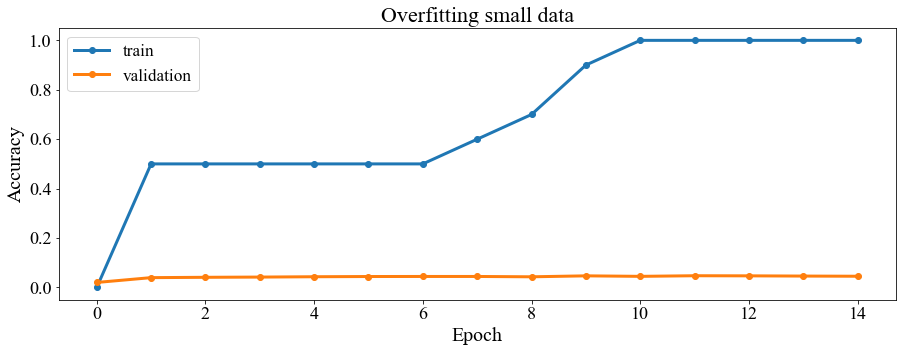

In [10]:
%matplotlib inline
plt.rcParams['figure.figsize']=(15.0,5.0)
plt.rcParams['image.interpolation']='nearest'
plt.rcParams['font.family']='Times New Roman'

fig=plt.figure()
plt.plot(h.history['accuracy'],'-o',linewidth=3.0)
plt.plot(h.history['val_accuracy'],'-o',linewidth=3.0)
plt.title('Overfitting small data',fontsize=22)
plt.legend(['train','validation'],loc='upper left',fontsize='xx-large')
plt.xlabel('Epoch',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.tick_params(labelsize=18)

plt.show()

fig.savefig('overfitting_small_data.png')
plt.close()

# Comparing with different size of filter

In [ ]:
filters = [3, 5, 9, 13, 15]
model = [0] * len(filters)

for i in range(len(model)):
    model[i] = Sequential()
    model[i].add(Conv2D(32, kernel_size=filters[i], padding='same', activation='relu', input_shape=(32, 32, 3)))
    model[i].add(MaxPool2D(pool_size=2))
    model[i].add(Flatten())
    model[i].add(Dense(500, activation='relu'))
    model[i].add(Dense(43, activation='softmax'))
    model[i].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs))
epochs = 5

h = [0] * len(model)

for i in range(len(h)):
    h[i] = model[i].fit(data['x_train'], data['y_train'],
                        batch_size=5, epochs = epochs,
                        validation_data = (data['x_validation'], data['y_validation']),
                        callbacks=[annealer], verbose=0)
    
    print('Model with filters {0:d}x{0:d}, epochs={1:d}, training accuracy={2:.5f}, validation accuracy={3:.5f}'.\
      format(filters[i], epochs, max(h[i].history['accuracy']), max(h[i].history['val_accuracy'])))

# Visualizing accuracy (with different filter size)

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['font.family'] = 'Times New Roman'

fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(h[4].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[3].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[2].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[1].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[0].history['accuracy'], '-o', linewidth=3.0)
plt.legend(['filter 15', 'filter 13', 'filter 9', 'filter 5', 'filter 3'], loc='lower right', fontsize='xx-large', borderpad=2)
plt.xlabel('Epoch', fontsize=20, fontname='Times New Roman')
plt.ylabel('Training Accuracy', fontsize=20, fontname='Times New Roman')
plt.yscale('linear') 
plt.ylim(0.85, 1.0)
plt.xlim(0.5, 5.3) 
plt.title('Accuracy for different sizes of filters', fontsize=22)
plt.tick_params(labelsize=18)

plt.subplot(2, 1, 2)
plt.plot(h[4].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[3].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[2].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[1].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[0].history['val_accuracy'], '-o', linewidth=3.0)
plt.legend(['filter 15', 'filter 13', 'filter 9', 'filter 5', 'filter 3'], loc='lower right', fontsize='xx-large', borderpad=2)
plt.xlabel('Epoch', fontsize=20, fontname='Times New Roman')
plt.ylabel('Validation Accuracy', fontsize=20, fontname='Times New Roman')
plt.yscale('linear')  
plt.ylim(0.75, 0.9)
plt.xlim(0.5, 5.3)
plt.tick_params(labelsize=18)

plt.show()

fig.savefig('models_accuracy.png')
plt.close()


for i in range(len(h)):
    print('data2 filter {0:d} training accuracy = {1:.5f}'.\
          format(filters[i], np.max(h[i].history['accuracy'])))

print()

for i in range(len(h)):
    print('data2 filter {0:d} validation accuracy = {1:.5f}'.\
          format(filters[i], np.max(h[i].history['val_accuracy'])))

In [ ]:
for i in range(len(model)):
    temp = model[i].predict(data['x_test'])
    temp = np.argmax(temp, axis=1)

    temp = np.mean(temp == data['y_test'])
    
    print('data2 filter {0:d} testing accuracy = {1:.5f}'.format(filters[i], temp))

In [ ]:
for i in range(len(model)):
    start = timer()
    temp = model[i].predict(data['x_test'][:1, :, :, :])
    end = timer()
    
    print('data2 filter {0:d} classification time = {1:.5f}'.format(filters[i], end - start))

# Visualizing filters of convolutional layer (with different size)

In [ ]:
for i in range(len(model)):
    w = model[i].get_weights()
    print(w[0].shape)

    temp = w[0].transpose(3, 0, 1, 2)
    print(temp.shape)  # (81, 32, 32, 3)

    fig = plt.figure()
    grid = convert_to_grid(temp)
    plt.imshow(grid.astype('uint8'), cmap='gray')
    plt.axis('off')
    plt.gcf().set_size_inches(10, 10)
    name = 'Trained filters ' + str(filters[i]) + 'x' + str(filters[i])
    plt.title(name, fontsize=18)
    
    plt.show()

    name = 'filters-' + str(filters[i]) + 'x' + str(filters[i]) + '.png'
    fig.savefig(name)
    plt.close()

# How about accuracy with different layer?

In [ ]:
filters = [3, 5, 9]
model = [0] * len(filters)

for i in range(len(model)):
    model[i] = Sequential()
    model[i].add(Conv2D(32, kernel_size=filters[i], padding='same', activation='relu', input_shape=(32, 32, 3)))
    model[i].add(Conv2D(32, kernel_size=filters[i], padding='same', activation='relu', input_shape=(32, 32, 3)))
    model[i].add(MaxPool2D(pool_size=2))
    model[i].add(Dropout(rate=0.5))
    model[i].add(Conv2D(32, kernel_size=filters[i], padding='same', activation='relu', input_shape=(32, 32, 3)))
    model[i].add(Conv2D(32, kernel_size=filters[i], padding='valid', activation='relu', input_shape=(32, 32, 3)))
    model[i].add(MaxPool2D(pool_size=2))
    model[i].add(Dropout(rate=0.5))
    model[i].add(Flatten())
    model[i].add(Dense(500, activation='relu'))
    model[i].add(Dropout(rate=0.5))
    model[i].add(Dense(500, activation='relu'))
    model[i].add(Dropout(rate=0.5))
    model[i].add(Dense(43, activation='softmax'))
    model[i].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model[0].summary()


In [ ]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs))
epochs = 5

h = [0] * len(model)

for i in range(len(h)):
    h[i] = model[i].fit(data['x_train'], data['y_train'],
                        batch_size=5, epochs = epochs,
                        validation_data = (data['x_validation'], data['y_validation']),
                        callbacks=[annealer], verbose=0)
    
    print('Model with filters {0:d}x{0:d}, epochs={1:d}, training accuracy={2:.5f}, validation accuracy={3:.5f}'.\
      format(filters[i], epochs, max(h[i].history['accuracy']), max(h[i].history['val_accuracy'])))

In [ ]:
for i in range(len(model)):
    temp = model[i].predict(data['x_test'])
    temp = np.argmax(temp, axis=1)

    temp = np.mean(temp == data['y_test'])
    
    print('data2 filter {0:d} testing accuracy = {1:.5f}'.format(filters[i], temp))

In [ ]:
for i in range(len(model)):
    start = timer()
    temp = model[i].predict(data['x_test'][:1, :, :, :])
    end = timer()
    
    print('data2 filter {0:d} classification time = {1:.5f}'.format(filters[i], end - start))

In [ ]:
for i in range(len(model)):
    w = model[i].get_weights()
    print(w[0].shape)

    temp = w[0].transpose(3, 0, 1, 2)
    print(temp.shape)  # (81, 32, 32, 3)

    fig = plt.figure()
    grid = convert_to_grid(temp)
    plt.imshow(grid.astype('uint8'), cmap='gray')
    plt.axis('off')
    plt.gcf().set_size_inches(10, 10)
    name = 'Trained filters ' + str(filters[i]) + 'x' + str(filters[i])
    plt.title(name, fontsize=18)
    
    plt.show()

    name = 'filters-' + str(filters[i]) + 'x' + str(filters[i]) + '.png'
    fig.savefig(name)
    plt.close()

In [ ]:
%matplotlib inline

# Preparing image for predicting from test dataset
x_input = data['x_test'][100:101]
print(x_input.shape)
y_input = data['y_test'][100:101]
print(y_input)

plt.rcParams['figure.figsize'] = (2.5, 2.5) # Setting default size of plots
plt.imshow(x_input[0, :, :, :])
plt.axis('off')

# Showing the plot
plt.show()

# Getting scores from forward pass of input image
scores = model[0].predict(x_input)
print(scores[0].shape) # (43,)

# Scores is given for image with 43 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)
print('ClassId:', prediction)

# Defining function for getting texts for every class - labels
def label_text(file):
    # Defining list for saving label in order from 0 to 42
    label_list = []
    
    # Reading 'csv' file and getting image's labels
    r = pd.read_csv(file)
    # Going through all names
    for name in r['SignName']:
        # Adding from every row second column with name of the label
        label_list.append(name)
    
    # Returning resulted list with labels
    return label_list


# Getting labels
labels = label_text("D:/Lab/ML/Lab07/label_names.csv")

# Printing label for classified Traffic Sign
print('Label:', labels[prediction])

4. What is overfitting? How to overcome overfitting in an ML model?

A statistical model is said to be overfitted when we feed it a lot more data than 
necessary. When a model fits more data than it actually needs, it starts 
catching the noisy data and inaccurate values in the data. As a result, the 
efficiency and accuracy of the model decrease. 
There are several techniques to avoid overfitting in Machine Learning altogether 
listed below. 
1. Cross-Validation 
2. Training With More Data 
3. Removing Features 
4. Early Stopping 
5. Regularization 
6. Ensembling 

 Cross-Validation
 
 
One of the most powerful features to avoid/prevent overfitting is crossvalidation. The idea behind this is to use the initial training data to generate mini 
train-test-splits, and then use these splits to tune your model. 
In a standard k-fold validation, the data is partitioned into k-subsets also known 
as folds. After this, the algorithm is trained iteratively on k-1 folds while using 
the remaining folds as the test set, also known as holdout fold. 
![image.png](attachment:image.png)
The cross-validation helps us to tune 
the hyperparameters with only the original training set. It basically keeps the 
test set separately as a true unseen data set for selecting the final model. Hence, 
avoiding overfitting altogether
.
 Training With More Data
 
This technique might not work every time, as we have also discussed in the 
example above, where training with a significant amount of population helps 
the model. It basically helps the model in identifying the signal better. 
But in some cases, the increased data can also mean feeding more noise to the 
model. When we are training the model with more data, we have to make sure 
the data is clean and free from randomness and inconsistencies. 


 Removing Features
 
 
Although some algorithms have an automatic selection of features. For a 
significant number of those who do not have a built-in feature selection, we can 
manually remove a few irrelevant features from the input features to improve 
the generalization. 
One way to do it is by deriving a conclusion as to how a feature fits into the 
model. It is quite similar to debugging the code line-by-line. 
In case if a feature is unable to explain the relevancy in the model, we can simply 
identify those features. We can even use a few feature selection heuristics for a 
good starting point. 

 Early Stopping
 
When the model is training, you can actually measure how well the model 
performs based on each iteration. We can do this until a point when the 
iterations improve the model’s performance. After this, the model overfits the 
training data as the generalization weakens after each iteration. 
So basically, early stopping means stopping the training process before the 
model passes the point where the model begins to overfit the training data. This 
technique is mostly used in deep learning.


 Regularization
 
It basically means, artificially forcing your model to be simpler by using a broader 
range of techniques. It totally depends on the type of learner that we are using. 
For example, we can prune a decision tree, use a dropout on a neural network or 
add a penalty parameter to the cost function in regression. 
Quite often, regularization is a hyperparameter as well. It means it can also be 
tuned through cross-validation. 


 Ensembling
 
This technique basically combines predictions from different Machine Learning 
models. Two of the most common methods for ensembling are listed below: 
 Bagging attempts to reduce the chance overfitting the models 
 Boosting attempts to improve the predictive flexibility of simpler models 
Even though they are both ensemble methods, the approach totally starts from 
opposite directions. Bagging uses complex base models and tries to smooth out 
their predictions while boosting uses simple base models and tries to boost its 
aggregate complexity. 
In statistic modeling, the goodness of fit refers to how closely the outcomes or 
predicted values match the observed or true values. A model that has learned 
noise instead of the signal is overfitted because it will fit the training data set 
but will have poorer efficiency with the new data set. 

References 
https://www.edureka.co/blog/overfitting-in-machine-learning/